In [1]:
from sklearn.cluster import KMeans 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

from collections import Counter 
import csv

In [2]:
# rawcount 
from collections import Counter 
import csv

def rawcount(filename, vocab, output):
    word_i = {}
    with open(vocab, 'r') as v:
        i = -1
        for word in v:
            if i == -1:
                i += 1
                continue 
            word = word.strip()
            word_i[word.split(',')[1]] = i 
            i += 1

    with open(output, 'w') as out:
        wr = csv.writer(out) 

        with open(filename, 'r') as f:
            i = -1 
            for line in f:
            # ignore the header
                if i == -1:
                    i += 1
                    continue 

                # remove \n
                line = line.strip() 

                words = line.split(',')
                p, seq = words[0], words[1:]
                counter = Counter(seq) 
                p_rep = [0]*len(word_i)

                for key, freq in dict(counter).items():
                    p_rep[word_i[key]] = freq 
                
                wr.writerow([p]+p_rep)
    

# Cluster Cohorts of Patients in Synthetic Data

In [3]:
convae_data_1 = pd.read_csv('synthetic/TRconvae-avg_vect_1.csv', header=None)
convae_data_1 = convae_data_1.drop(columns=[0])
convae_data_1.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-0.245492,-1.723636,-0.217432,1.412599,2.090927,3.460979,3.219759,2.154350,1.517181,2.821212,...,-1.767284,-1.005675,-1.898477,-2.506755,2.391586,1.796674,0.014357,-1.714161,-1.905629,-2.658079
1,-0.177317,0.581434,-0.233557,-0.819438,-0.856149,1.534644,0.902444,0.126829,0.291722,0.764937,...,-0.202243,0.865371,-0.551938,-0.140060,0.598072,0.185291,1.061913,-0.093946,0.092072,0.465387
2,-0.086251,0.289699,-0.127992,-0.498970,-0.148464,1.362606,0.810772,-0.163232,-0.435123,1.222380,...,-0.430280,0.629954,-0.565389,0.090852,0.130159,0.272310,0.473577,-0.101833,-0.001948,0.319315
3,-0.650934,-0.204592,-0.168182,-1.271896,-0.134454,1.193196,0.795659,0.319215,-0.724538,1.937363,...,-0.066636,-0.058400,-1.086811,-0.447154,0.839730,0.917877,0.798910,-0.865329,-0.244640,-0.172857
4,0.338212,1.027026,0.182270,-1.075088,-0.242471,0.488513,1.398482,-0.588494,0.183105,0.659151,...,-0.729216,1.467192,0.488018,-0.057133,-0.086303,-0.434823,1.025620,0.104759,0.261447,0.593806


In [4]:
convae_data_2 = pd.read_csv('synthetic/TRconvae-avg_vect_2.csv', header=None)
convae_data_2 = convae_data_2.drop(columns=[0])
convae_data_2.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,3.460280,-1.165073,0.043982,-0.209492,0.691597,-0.023895,0.588930,-0.065933,-0.062688,-2.780302,...,3.837300,1.916883,-0.023542,-0.230170,-2.105041,3.084079,-1.048391,-1.242677,-1.625257,1.863790
1,0.094355,-0.269476,-0.896734,-0.336747,-0.741758,0.211373,-0.197271,-1.365462,-0.121160,0.344159,...,0.956573,0.295175,0.096312,-0.467132,-0.473703,0.175847,0.034651,-0.062616,0.048358,0.423669
2,-0.016761,-0.525858,-0.926781,0.099622,-1.112849,0.558424,0.014202,-1.164957,0.400407,0.595222,...,0.879721,0.042045,0.250709,-0.459051,-0.395686,0.296956,0.533112,-0.158044,-0.388362,0.519822
3,0.121185,0.093348,-0.813224,-0.549337,-0.322482,0.427428,-0.452533,-0.515359,-0.242799,0.266890,...,0.112507,-0.083479,0.149594,-0.693066,0.206137,-0.243773,0.206056,-0.331201,-0.546232,0.411023
4,3.246645,-0.045888,0.005351,0.497746,-0.444151,0.366363,1.445255,0.271684,-0.220651,-2.101012,...,3.391958,0.269805,0.052752,0.763482,-2.929876,1.655250,-0.830859,-1.148471,-2.996922,2.726214


In [5]:
## run only when first time generates the raw count of the synthetic data
# rawcount('synthetic/cohort-ehrseq.csv', 'synthetic/cohort-vocab.csv', 'synthetic/rawcount.csv')

In [6]:
rc_data = pd.read_csv('synthetic/rawcount.csv', header=None)
rc_data = rc_data.drop(columns=[0])
rc_data.head()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
rc_data = rc_data.values
convae_data_1 = convae_data_1.values
convae_data_2 = convae_data_2.values

In [8]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k, random_state=1234).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
        sse.append(curr_sse)
    return sse

Text(0.5, 0, 'k values')

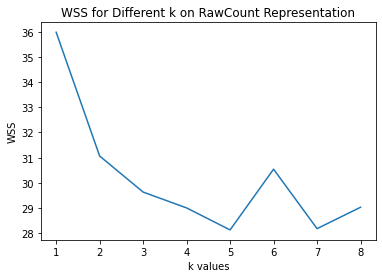

In [9]:
wss_score = calculate_WSS(rc_data, 8)
plt.plot(range(1, 9), wss_score)
plt.title("WSS for Different k on RawCount Representation")
plt.ylabel('WSS')
plt.xlabel('k values')

Text(0.5, 0, 'k values')

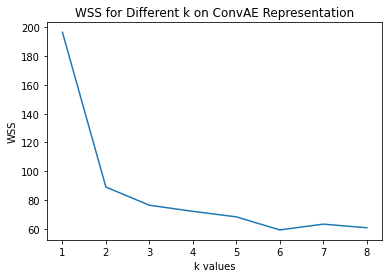

In [10]:
wss_score = calculate_WSS(convae_data_1, 8)
plt.plot(range(1, 9), wss_score)
plt.title("WSS for Different k on ConvAE Representation")
plt.ylabel('WSS')
plt.xlabel('k values')

In [11]:
pca = PCA(2) 

rc_data_2 = pca.fit_transform(rc_data)
convae_data_12 = pca.fit_transform(convae_data_1) 
convae_data_22 = pca.fit_transform(convae_data_2) 

## k=2 clustering

In [12]:
cn = 2
km_rc = KMeans(cn).fit(rc_data)
km_convae1 = KMeans(cn).fit(convae_data_1)
km_convae2 = KMeans(cn).fit(convae_data_2)

In [13]:
print(metrics.silhouette_score(convae_data_1, km_convae1.labels_))
print(metrics.silhouette_score(convae_data_2, km_convae2.labels_))
print(metrics.silhouette_score(rc_data, km_rc.labels_))

0.6171488014869471
0.6804293786556501
0.08214529130164738


Text(0, 0.5, 'PCA 2 feature')

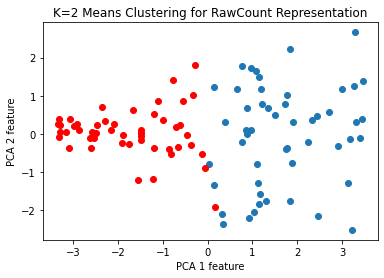

In [14]:
rc_label1 = rc_data_2[km_rc.labels_ == 0]

plt.scatter(rc_label1[:, 0], rc_label1[:, 1])
rc_label2 = rc_data_2[km_rc.labels_ == 1]
plt.scatter(rc_label2[:, 0], rc_label2[:, 1], color='red')
plt.title('K=2 Means Clustering for RawCount Representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')

Text(0, 0.5, 'PCA 2 feature')

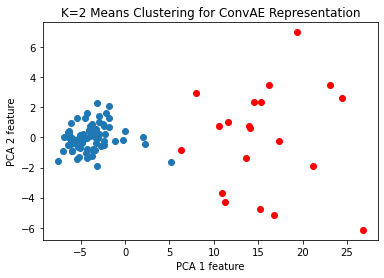

In [15]:
convae_label1 = convae_data_12[km_convae1.labels_ == 0]

plt.scatter(convae_label1[:, 0], convae_label1[:, 1])
convae_label2 = convae_data_12[km_convae1.labels_ == 1]
plt.scatter(convae_label2[:, 0], convae_label2[:, 1], color='red')
plt.title('K=2 Means Clustering for ConvAE Representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')

## k=5 clustering

In [16]:
cn = 5
km_rc = KMeans(cn).fit(rc_data)
km_convae_12 = KMeans(cn).fit(convae_data_1)
km_convae_22 = KMeans(cn).fit(convae_data_2)

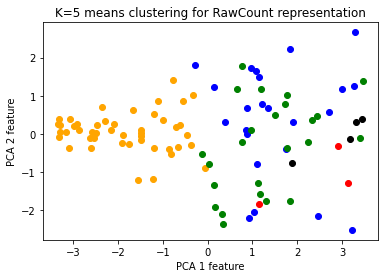

In [17]:
colors = ['red', 'blue', 'orange', 'black', 'green']
for label in range(5):
    rc_label = rc_data_2[km_rc.labels_ == label]
    plt.scatter(rc_label[:, 0], rc_label[:, 1], color=colors[label])

plt.title('K=5 means clustering for RawCount representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')
plt.show()

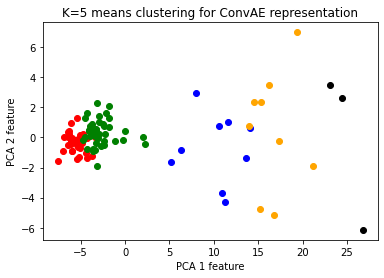

In [18]:
colors = ['red', 'blue', 'orange', 'black', 'green']
for label in range(5):
    convae_label = convae_data_12[km_convae_12.labels_ == label]
    plt.scatter(convae_label[:, 0], convae_label[:, 1], color=colors[label])

plt.title('K=5 means clustering for ConvAE representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')
plt.show()

# Suicide Risk Assessment based on Reddit Posts

## Data Preprocess(no need to run this when evaluating the model)

In [19]:
import re
import collections 

data = suicide_data = pd.read_csv('500_Reddit_users_posts_labels.csv')

posts = []
vocabulary = {}

for userpost in data.Post.values:
    posts.append([]) 
    for post in userpost[2:-2].split('\','):
        posts[-1].append(re.sub('[^a-zA-Z0-9 \n]', '', post).lower())

    
        for word in posts[-1][-1].split(' '):
            if word not in vocabulary:
                vocabulary[word] = len(vocabulary)
    posts[-1] = ''.join(posts[-1])

train_idx = np.random.choice(len(posts), int(0.7*len(posts)), replace=False)
test_idx = np.array(list(set(range(len(posts))).difference(set(train_idx))))
train_posts = np.array(posts)[train_idx]
test_posts = np.array(posts)[test_idx]

with open('cohort-ehrseq.csv', 'w') as train_out:
    train_out.write('MRN,EHRseq\n')  

    for i, p in enumerate(train_posts):
        word_list = p.split(' ')
        word_emb = [str(vocabulary[w]) for w in word_list]
        word_str = ','.join(word_emb)
        train_out.write(f'pat_{train_idx[i]},{word_str}\n')
    
with open('cohort_test-ehrseq.csv', 'w') as test_out:
    test_out.write('MRN,EHRseq\n')  

    for i, p in enumerate(test_posts):
        word_list = p.split(' ')
        word_emb = [str(vocabulary[w]) for w in word_list]
        word_str = ','.join(word_emb)
        test_out.write(f'pat_{test_idx[i]},{word_str}\n')
        
with open('cohort-vocab.csv', 'w') as vocab_out:
    vocab_out.write('LABEL,CODE\n')  

    for key in vocabulary:
        vocab_out.write(f'{key},{vocabulary[key]}\n')
        
np.save(
    open('train_idx.txt', 'wb'),
    train_idx
)
np.save(
    open('test_idx.txt', 'wb'), 
    test_idx
)

## Visualize Clustering

In [20]:
convae_data_1 = pd.read_csv('suicide/TRconvae-avg_vect_1.csv', header=None)
convae_data_1 = convae_data_1.drop(columns=[0])
convae_data_1.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,4.792002,-4.182917,0.504329,1.034935,6.722288,2.965201,-7.597964,6.288152,1.327902,-3.691782,...,-4.469840,-0.809733,2.743039,2.791558,3.434430,5.926430,-1.437946,-2.517109,5.947384,3.499781
1,3.031826,-2.228876,0.723921,1.243128,0.335348,0.966756,-2.259586,2.042837,1.677121,-2.544549,...,-2.905806,-1.389448,1.969885,0.689893,-0.540738,2.790236,0.998298,-2.344237,3.917216,1.695267
2,4.347315,0.317548,9.783994,1.039316,-6.086713,-3.634538,-2.878214,2.623119,0.926128,-3.325168,...,-2.733623,-2.882202,4.613301,-1.638416,-0.787181,1.801085,2.008439,-2.242496,3.588685,0.511575
3,4.722687,1.320996,12.259055,0.045357,-7.071722,-4.573728,-3.511061,2.502617,0.535087,-2.168540,...,-2.568284,-2.593325,6.170129,-3.251006,-0.783794,1.943220,1.631231,-3.375519,3.806715,-0.969864
4,2.957799,-2.804701,-1.197343,1.118323,2.548878,1.793160,-3.890705,1.929259,1.277872,-2.188694,...,-2.946431,-0.506851,1.684679,1.369734,0.733448,3.910773,0.118717,-2.856843,4.061832,1.492922


In [21]:
convae_data_2 = pd.read_csv('suicide/TRconvae-avg_vect_2.csv', header=None)
convae_data_2 = convae_data_2.drop(columns=[0])
convae_data_2.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-0.265760,1.819030,2.114592,-1.503902,1.709242,1.080806,2.508768,2.006261,-2.160024,1.149742,...,-0.761870,0.483298,2.443803,-0.542755,0.534815,-1.088351,-2.180832,-2.487342,-1.508296,-1.993607
1,-0.111605,2.074826,2.444105,-1.740146,1.859789,0.832969,2.819070,2.144344,-2.465429,1.165465,...,-0.809549,0.820165,2.769438,-0.086744,0.541063,-1.366083,-2.689430,-2.858235,-1.534366,-2.045888
2,-1.081815,4.426412,3.382702,-3.064773,1.503283,2.644223,3.081339,1.536571,-4.454443,0.523732,...,-0.469871,0.311442,2.297619,0.251516,-0.340333,-2.125811,-5.249793,-2.501698,-1.029516,-1.661276
3,-1.153381,2.246483,1.979828,-1.829293,1.712191,1.823514,2.249827,1.622034,-2.578066,0.850274,...,-0.643407,-0.029906,1.923287,-0.989684,0.266016,-1.610323,-2.569872,-2.158781,-1.231015,-1.765235
4,-0.747093,3.698134,2.605899,-3.106969,1.862821,2.313798,2.278987,1.505187,-3.374255,0.680390,...,-1.077267,-0.205817,1.848762,0.063171,-0.293556,-1.952785,-4.631961,-2.074854,-1.011812,-1.770192


In [22]:
rc_data = pd.read_csv('suicide/suicide_rawcount.csv', header=None)
rc_data = rc_data.drop(columns=[0])
rc_data.head()

,1,2,3,4,5,6,7,8,9,10,...,22920,22921,22922,22923,22924,22925,22926,22927,22928,22929
0,6,7,22,0,2,38,3,15,0,10,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,27,0,0,26,2,10,0,18,...,0,0,0,0,0,0,0,0,0,0
3,0,11,42,0,0,76,1,26,0,18,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2,0,0,8,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
convae_data1 = convae_data_1.values
convae_data2 = convae_data_2.values
rc_data = rc_data.values

In [24]:
pca = PCA(2) 

rc_data_2 = pca.fit_transform(rc_data)
convae_data_12 = pca.fit_transform(convae_data1) 
convae_data_22 = pca.fit_transform(convae_data2) 

In [25]:
# generate labels
suicide_label_map = {'Supportive':0, 'Indicator':1, 'Ideation':2, 'Behavior':3, 'Attempt':4}
mapLabel = np.vectorize(lambda x: suicide_label_map[x])

suicide_data = pd.read_csv('suicide/500_Reddit_users_posts_labels.csv')
suicide_label = mapLabel(suicide_data.Label)

train_idx = np.load('suicide/train_idx.txt')
test_idx = np.load('suicide/test_idx.txt')

In [26]:
suicide_train_label = suicide_label[train_idx]

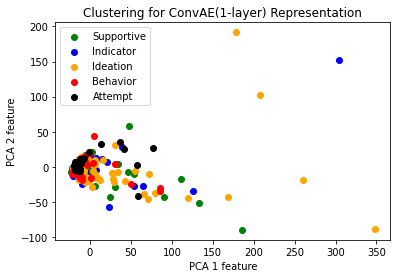

In [27]:
colors = ['green', 'blue', 'orange', 'red', 'black']
labels = ['Supportive', 'Indicator', 'Ideation', 'Behavior', 'Attempt']
for label in range(5):
    convae_labeli = convae_data_12[suicide_train_label == label]
    plt.scatter(convae_labeli[:, 0], convae_labeli[:, 1], color=colors[label], label=labels[label])
plt.title('Clustering for ConvAE(1-layer) Representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')
plt.legend()

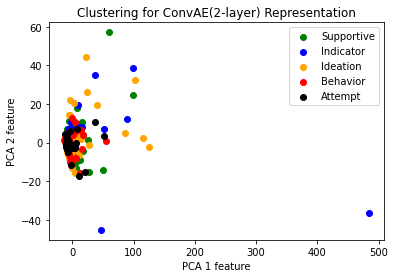

In [28]:
colors = ['green', 'blue', 'orange', 'red', 'black']
labels = ['Supportive', 'Indicator', 'Ideation', 'Behavior', 'Attempt']
for label in range(5):
    convae_labeli = convae_data_22[suicide_train_label == label]
    plt.scatter(convae_labeli[:, 0], convae_labeli[:, 1], color=colors[label], label=labels[label])
plt.title('Clustering for ConvAE(2-layer) Representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')
plt.legend()

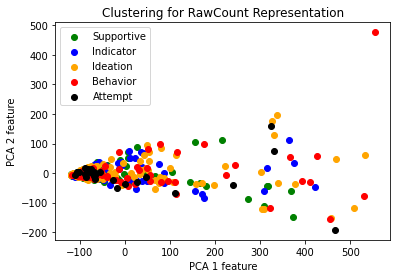

In [29]:
import matplotlib.pyplot as plt

colors = ['green', 'blue', 'orange', 'red', 'black']
for label in range(5):
    rc_labeli = rc_data_2[suicide_train_label == label]
    plt.scatter(rc_labeli[:, 0], rc_labeli[:, 1], color=colors[label], label=labels[label])
plt.title('Clustering for RawCount Representation')
plt.xlabel('PCA 1 feature')
plt.ylabel('PCA 2 feature')
plt.legend()

## Hierarchical Clustering

In [30]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [31]:
rc_hierarchical = AgglomerativeClustering(n_clusters=5).fit(rc_data)
convae1_hierarchical = AgglomerativeClustering(n_clusters=5).fit(convae_data_1)
convae2_hierarchical = AgglomerativeClustering(n_clusters=5).fit(convae_data_2)

In [32]:
print(f'Purity for ConvAE with 1-layer CNN is {purity_score(convae1_hierarchical.labels_, suicide_train_label)}')
print(f'Purity for ConvAE with 2-layer CNN is {purity_score(convae2_hierarchical.labels_, suicide_train_label)}')

Purity for ConvAE with 1-layer CNN is 0.62
Purity for ConvAE with 2-layer CNN is 0.84


In [33]:
print(f'Entropy for ConvAE with 1-layer CNN is {metrics.homogeneity_score(convae1_hierarchical.labels_, suicide_train_label)}')
print(f'Entropy for ConvAE with 2-layer CNN is {metrics.homogeneity_score(convae2_hierarchical.labels_, suicide_train_label)}')

Entropy for ConvAE with 1-layer CNN is 0.0219725368773614
Entropy for ConvAE with 2-layer CNN is 0.03837413298317611
